# Data Collection & Data Cleansing 
โหลดข้อมูลจาก kaggle ข้อมูลที่ใช้ทำ Mini Project นี้ superstore.csv และ Clean ข้อมูล

In [4]:
import pandas as pd
import numpy as np

In [5]:
superstore = pd.read_csv("/content/superstore.csv", index_col='Row ID')

In [6]:
superstore.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Data Profiling

ดูมีกี่ row และ column

In [7]:
superstore.shape

(9994, 20)

In [8]:
type(superstore)

pandas.core.frame.DataFrame

In [9]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 1 to 9994
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Order Date     9994 non-null   object 
 2   Ship Date      9994 non-null   object 
 3   Ship Mode      9994 non-null   object 
 4   Customer ID    9994 non-null   object 
 5   Customer Name  9994 non-null   object 
 6   Segment        9994 non-null   object 
 7   Country        9994 non-null   object 
 8   City           9994 non-null   object 
 9   State          9994 non-null   object 
 10  Postal Code    9994 non-null   int64  
 11  Region         9994 non-null   object 
 12  Product ID     9994 non-null   object 
 13  Category       9994 non-null   object 
 14  Sub-Category   9994 non-null   object 
 15  Product Name   9994 non-null   object 
 16  Sales          9994 non-null   float64
 17  Quantity       9994 non-null   int64  
 18  Discount

In [10]:
superstore.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

ทำการ Rename คอลัมน์

In [11]:
superstore.rename(columns={'Order ID': 'Order_ID',
                           'Order Date': 'Order_Date', 'Ship Date': 'Ship_Date',
                           'Ship Mode': 'Ship_Mode', 'Customer ID': 'Customer_ID',
                           'Customer Name': 'Customer_Name', 'Postal Code': 'Postal_Code',
                           'Product ID': 'Product_ID', 'Sub-Category': 'Sub_Category',
                           'Product Name': 'Product_Name'},inplace=True)

In [12]:
superstore.columns

Index(['Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode', 'Customer_ID',
       'Customer_Name', 'Segment', 'Country', 'City', 'State', 'Postal_Code',
       'Region', 'Product_ID', 'Category', 'Sub_Category', 'Product_Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

แปลงคอลัมน์ Order_Date, Ship_Date ให้เป็น datetime

In [13]:
superstore['Order_Date'] = pd.to_datetime(superstore['Order_Date'])
superstore['Ship_Date'] = pd.to_datetime(superstore['Ship_Date'])

In [14]:
superstore[['Order_Date', 'Ship_Date']]

,Order_Date,Ship_Date
Row ID,,
1,2016-11-08,2016-11-11
2,2016-11-08,2016-11-11
3,2016-06-12,2016-06-16
4,2015-10-11,2015-10-18
5,2015-10-11,2015-10-18
...,...,...
9990,2014-01-21,2014-01-23
9991,2017-02-26,2017-03-03
9992,2017-02-26,2017-03-03


In [15]:
superstore.dtypes

Order_ID                 object
Order_Date       datetime64[ns]
Ship_Date        datetime64[ns]
Ship_Mode                object
Customer_ID              object
Customer_Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal_Code               int64
Region                   object
Product_ID               object
Category                 object
Sub_Category             object
Product_Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [16]:
superstore[['Order_Date', 'Ship_Date']][0:10]

,Order_Date,Ship_Date
Row ID,,
1,2016-11-08,2016-11-11
2,2016-11-08,2016-11-11
3,2016-06-12,2016-06-16
4,2015-10-11,2015-10-18
5,2015-10-11,2015-10-18
6,2014-06-09,2014-06-14
7,2014-06-09,2014-06-14
8,2014-06-09,2014-06-14
9,2014-06-09,2014-06-14


# EDA - Exploratory Data Analysis

### Non-Graphical EDA แบบใช้ตัวเลข


In [17]:
type(superstore)

pandas.core.frame.DataFrame

ข้อมูลสรุปทางสติถิ

In [18]:
superstore.describe()

,Postal_Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


ข้อมูลสรุปทางสติถิคอลัมน์ Sales Quantity Profit Discount 

In [19]:
superstore[['Sales', 'Quantity', 'Profit', 'Discount']].describe()

,Sales,Quantity,Profit,Discount
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,28.656896,0.156203
std,623.245101,2.225110,234.260108,0.206452
min,0.444000,1.000000,-6599.978000,0.000000
25%,17.280000,2.000000,1.728750,0.000000
50%,54.490000,3.000000,8.666500,0.200000
75%,209.940000,5.000000,29.364000,0.200000
max,22638.480000,14.000000,8399.976000,0.800000


In [20]:
category_des = superstore.groupby(['Category'])
category_des.describe()

Postal_Code                                               \
                      count          mean           std     min      25%   
Category                                                                   
Furniture            2121.0  55726.556341  32261.888225  1040.0  22801.0   
Office Supplies      6026.0  54890.951211  32046.665773  1453.0  23223.0   
Technology           1847.0  55551.572279  31896.118284  1841.0  23392.0   

                                             Sales              ... Discount  \
                     50%      75%      max   count        mean  ...      75%   
Category                                                        ...            
Furniture        60505.0  90032.0  99301.0  2121.0  349.834887  ...      0.3   
Office Supplies  55247.0  90004.0  99301.0  6026.0  119.324101  ...      0.2   
Technology       59601.0  90008.0  99207.0  1847.0  452.709276  ...      0.2   

                      Profit                                              \
                 max   count       mean         std        min       25%   
Category                                                                   
Furniture        0.7  2121.0   8.699327  136.049246 -1862.3124 -12.84900   
Office Supplies  0.8  6026.0  20.327050  164.887280 -3701.8928   2.10150   
Technology       0.7  1847.0  78.752002  428.816633 -6599.9780   5.20365   

                                             
                     50%      75%       max  
Category                                     
Furniture         7.7748  33.7266  1013.127  
Office Supplies   6.8824  19.4163  4946.370  
Technology       25.0182  74.8946  8399.976  

[3 rows x 40 columns]

นับจำนวน Category มีกี่ประเภทด้วยคำสั่ง groupby(), value_counts()

In [21]:
superstore.groupby(['Category'])['Category'].count()

Category
Furniture          2121
Office Supplies    6026
Technology         1847
Name: Category, dtype: int64

In [22]:
superstore.groupby(['Sub_Category'])['Sub_Category'].count()

Sub_Category
Accessories     775
Appliances      466
Art             796
Binders        1523
Bookcases       228
Chairs          617
Copiers          68
Envelopes       254
Fasteners       217
Furnishings     957
Labels          364
Machines        115
Paper          1370
Phones          889
Storage         846
Supplies        190
Tables          319
Name: Sub_Category, dtype: int64

In [23]:
# นับจำนวน City มีกี่ประเทศ 
superstore['City'].value_counts(ascending=False).to_frame()

,City
New York City,915
Los Angeles,747
Philadelphia,537
San Francisco,510
Seattle,428
...,...
Glenview,1
Missouri City,1
Rochester Hills,1
Palatine,1


เรียงคอลัมน์ที่เลือกจากมากไปน้อย

In [24]:
superstore.sort_values(by='Sales', ascending=False).nlargest(5, 'Sales')

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
2698,CA-2014-145317,2014-03-18,2014-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,Florida,32216,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,0.5,-1811.0784
6827,CA-2016-118689,2016-10-02,2016-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,Indiana,47905,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760
8154,CA-2017-140151,2017-03-23,2017-03-25,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,Washington,98115,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808
2624,CA-2017-127180,2017-10-22,2017-10-24,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,New York,10024,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888
4191,CA-2017-166709,2017-11-17,2017-11-22,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,Delaware,19711,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856


หาปีในคอลัมน์ Order Date มีปีอะไรบ้าง

In [25]:
superstore[['Order_Date']].groupby(superstore.Order_Date.dt.year).agg('count')

,Order_Date
Order_Date,
2014,1993
2015,2102
2016,2587
2017,3312


หายอดขายทั้งหมดแบ่งแต่ละ Sub Category

In [26]:
superstore.groupby('Sub_Category').sum()['Sales']

Sub_Category
Accessories    167380.3180
Appliances     107532.1610
Art             27118.7920
Binders        203412.7330
Bookcases      114879.9963
Chairs         328449.1030
Copiers        149528.0300
Envelopes       16476.4020
Fasteners        3024.2800
Furnishings     91705.1640
Labels          12486.3120
Machines       189238.6310
Paper           78479.2060
Phones         330007.0540
Storage        223843.6080
Supplies        46673.5380
Tables         206965.5320
Name: Sales, dtype: float64

In [27]:
superstore['Sub_Category'].value_counts().loc[lambda x: x>1]

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub_Category, dtype: int64

หา Profit แต่ละ Sub Category เยอะที่สุด 5 อันดับ

In [28]:
superstore.groupby('Sub_Category').sum()['Profit'].nlargest(5)

Sub_Category
Copiers        55617.8249
Phones         44515.7306
Accessories    41936.6357
Paper          34053.5693
Binders        30221.7633
Name: Profit, dtype: float64

In [29]:
superstore.groupby(['City', 'Category'])['Sales'].agg(['sum','mean','std'])

sum        mean         std
City     Category                                         
Aberdeen Office Supplies    25.500   25.500000         NaN
Abilene  Office Supplies     1.392    1.392000         NaN
Akron    Furniture         433.596  216.798000   95.552754
         Office Supplies  1113.388   79.527714  178.168414
         Technology       1183.002  236.600400   96.529237
...                            ...         ...         ...
York     Furniture         422.058  422.058000         NaN
         Office Supplies   395.920   98.980000  104.394831
Yucaipa  Office Supplies    50.800   50.800000         NaN
Yuma     Office Supplies    55.352   27.676000   24.296189
         Technology        785.513  392.756500  293.065355

[1198 rows x 3 columns]

In [30]:
superstore.columns

Index(['Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode', 'Customer_ID',
       'Customer_Name', 'Segment', 'Country', 'City', 'State', 'Postal_Code',
       'Region', 'Product_ID', 'Category', 'Sub_Category', 'Product_Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [31]:
superstore[['Sales', 'Quantity', 'Discount', 'Profit']].agg(['sum','std','mean'])

,Sales,Quantity,Discount,Profit
sum,2.297201e+06,37873.000000,1561.090000,286397.021700
std,6.232451e+02,2.225110,0.206452,234.260108
mean,2.298580e+02,3.789574,0.156203,28.656896


In [32]:
superstore[['Sales', 'Profit']].apply(sum, axis=0)

Sales     2.297201e+06
Profit    2.863970e+05
dtype: float64

In [33]:
superstore.columns

Index(['Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode', 'Customer_ID',
       'Customer_Name', 'Segment', 'Country', 'City', 'State', 'Postal_Code',
       'Region', 'Product_ID', 'Category', 'Sub_Category', 'Product_Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

### Query & Filter 
ฟิลเตอร์ DataFrame ด้วยเงื่อนไขต่างใช้ฟังก์ชัน .query(), เลือก Column จาก DataFrame = dataframe['column_name']

In [34]:
# หา Accessories อยู่ในหมวดหมู่มีกี่แถว
superstore.query('Sub_Category == "Accessories" ').shape

(775, 20)

In [35]:
# หายอดขายในปี 2017 โดย State อยู่ใน California
superstore[superstore['Order_Date'].dt.year == 2017 ].query("State == 'California' ")

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
98,CA-2017-157833,2017-06-17,2017-06-20,First Class,KD-16345,Katherine Ducich,Consumer,United States,San Francisco,California,94122,West,OFF-BI-10001721,Office Supplies,Binders,Trimflex Flexible Post Binders,51.312,3,0.2,17.9592
142,CA-2017-106180,2017-09-18,2017-09-23,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,San Francisco,California,94122,West,OFF-AR-10000940,Office Supplies,Art,Newell 343,8.820,3,0.0,2.3814
143,CA-2017-106180,2017-09-18,2017-09-23,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,San Francisco,California,94122,West,OFF-EN-10004030,Office Supplies,Envelopes,Convenience Packs of Business Envelopes,10.860,3,0.0,5.1042
144,CA-2017-106180,2017-09-18,2017-09-23,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,San Francisco,California,94122,West,OFF-PA-10004327,Office Supplies,Paper,Xerox 1911,143.700,3,0.0,68.9760
206,CA-2017-108329,2017-12-09,2017-12-14,Standard Class,LE-16810,Laurel Elliston,Consumer,United States,Whittier,California,90604,West,TEC-PH-10001918,Technology,Phones,Nortel Business Series Terminal T7208 Digital ...,444.768,4,0.2,44.4768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9942,CA-2017-164028,2017-11-24,2017-11-30,Standard Class,JL-15835,John Lee,Consumer,United States,San Francisco,California,94122,West,TEC-AC-10001772,Technology,Accessories,Memorex Mini Travel Drive 16 GB USB 2.0 Flash ...,223.580,14,0.0,87.1962
9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932


สามารถสร้างคอลัมน์ Year เก็บค่าปีเท่านั้น

In [36]:
superstore['Year'] = superstore['Order_Date'].dt.year
superstore.columns

Index(['Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode', 'Customer_ID',
       'Customer_Name', 'Segment', 'Country', 'City', 'State', 'Postal_Code',
       'Region', 'Product_ID', 'Category', 'Sub_Category', 'Product_Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Year'],
      dtype='object')

In [37]:
# หา Profit ในปี 2017
superstore.query('Year == 2017')[['Profit']].sum()

Profit    93439.2696
dtype: float64

In [38]:
# หายอดขาดในปี 2015 เท่านั้นและเรียงจากน้อยไปมาก
superstore[(superstore['Order_Date'] > "2015-01-01") & (superstore['Order_Date'] < "2015-12-31" ) ]\
    .sort_values(by=['Order_Date'], ascending=True)

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,...,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Year
Row ID,,,,,,,,,,,,,,,,,,,,,
213,CA-2015-146262,2015-01-02,2015-01-09,Standard Class,VW-21775,Victoria Wilson,Corporate,United States,Medina,Ohio,...,East,OFF-LA-10004544,Office Supplies,Labels,Avery 505,23.680,2,0.2,8.8800,2015
214,CA-2015-146262,2015-01-02,2015-01-09,Standard Class,VW-21775,Victoria Wilson,Corporate,United States,Medina,Ohio,...,East,FUR-BO-10004695,Furniture,Bookcases,O'Sullivan 2-Door Barrister Bookcase in Odessa...,452.450,5,0.5,-244.3230,2015
215,CA-2015-146262,2015-01-02,2015-01-09,Standard Class,VW-21775,Victoria Wilson,Corporate,United States,Medina,Ohio,...,East,TEC-PH-10002844,Technology,Phones,Speck Products Candyshell Flip Case,62.982,3,0.4,-14.6958,2015
216,CA-2015-146262,2015-01-02,2015-01-09,Standard Class,VW-21775,Victoria Wilson,Corporate,United States,Medina,Ohio,...,East,TEC-MA-10000864,Technology,Machines,Cisco 9971 IP Video Phone Charcoal,1188.000,9,0.7,-950.4000,2015
217,CA-2015-146262,2015-01-02,2015-01-09,Standard Class,VW-21775,Victoria Wilson,Corporate,United States,Medina,Ohio,...,East,TEC-AC-10000109,Technology,Accessories,Sony Micro Vault Click 16 GB USB 2.0 Flash Drive,89.584,2,0.2,4.4792,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6009,CA-2015-135580,2015-12-30,2016-01-03,Standard Class,CL-12565,Clay Ludtke,Consumer,United States,Los Angeles,California,...,West,OFF-PA-10000595,Office Supplies,Paper,Xerox 1929,68.520,3,0.0,31.5192,2015
6011,CA-2015-135580,2015-12-30,2016-01-03,Standard Class,CL-12565,Clay Ludtke,Consumer,United States,Los Angeles,California,...,West,TEC-MA-10004002,Technology,Machines,Zebra GX420t Direct Thermal/Thermal Transfer P...,2548.560,6,0.2,286.7130,2015
6012,CA-2015-135580,2015-12-30,2016-01-03,Standard Class,CL-12565,Clay Ludtke,Consumer,United States,Los Angeles,California,...,West,OFF-EN-10003296,Office Supplies,Envelopes,Tyvek Side-Opening Peel & Seel Expanding Envel...,271.440,3,0.0,122.1480,2015


ค้นหา Segment = Corporate ในปี 2015 มีกี่แถว และ หายอดขาย

In [39]:
superstore['Segment'].value_counts().loc[lambda x: x>1]

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [40]:
segment_cor_2015 = superstore[(superstore['Year'] == 2015) | (superstore['Segment']== "Corporate" ) ]
segment_cor_2015.shape

(4486, 21)

In [41]:
segment_cor_2015[['Sales']].apply(sum, axis=0)

Sales    1.047922e+06
dtype: float64

In [42]:
np.sum(segment_cor_2015[['Sales']])

Sales    1.047922e+06
dtype: float64

In [43]:
# สามารถใช้ .query() หา Segment = Corporate ในปี 2015 ได้ผลลัทธ์เหมือนกัน
superstore.query('Year ==  "2015"  | Segment == "Corporate" ')

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,...,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Year
Row ID,,,,,,,,,,,,,,,,,,,,,
3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714,2016
22,CA-2016-137330,2016-12-09,2016-12-13,Standard Class,KB-16585,Ken Black,Corporate,United States,Fremont,Nebraska,...,Central,OFF-AR-10000246,Office Supplies,Art,Newell 318,19.460,7,0.0,5.0596,2016
23,CA-2016-137330,2016-12-09,2016-12-13,Standard Class,KB-16585,Ken Black,Corporate,United States,Fremont,Nebraska,...,Central,OFF-AP-10001492,Office Supplies,Appliances,"Acco Six-Outlet Power Strip, 4' Cord Length",60.340,7,0.0,15.6884,2016
36,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,Texas,...,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544,7,0.2,123.4737,2016
37,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,Texas,...,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.920,5,0.6,-147.9630,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9965,CA-2016-146374,2016-12-05,2016-12-10,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,Delaware,...,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.400,1,0.0,6.4320,2016
9966,CA-2016-146374,2016-12-05,2016-12-10,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,Delaware,...,East,OFF-PA-10000349,Office Supplies,Paper,Easy-staple paper,4.980,1,0.0,2.3406,2016
9967,CA-2016-146374,2016-12-05,2016-12-10,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,Delaware,...,East,OFF-EN-10004483,Office Supplies,Envelopes,"#10 White Business Envelopes,4 1/8 x 9 1/2",109.690,7,0.0,51.5543,2016


หาสัดส่วนยอดขายรวม (%) ใน West + Centarl ปี 2017 เป็นเท่าใด เช่น 25%

In [44]:
all_sales = superstore['Sales'].sum().round(2)
print(f"Total Sales: {all_sales}")

west_central = superstore[(superstore['Year'] == 2017)].query('Region == "West" | Region == "Central" ')
west_central = west_central['Sales'].sum()
print(f"Total Sales West+Central : {west_central}")

proportion = west_central / (all_sales/100)
print(f"Proportion : {proportion.round(2)} % of all")

Total Sales: 2297200.86
Total Sales West+Central : 397226.4937
Proportion : 17.29 % of all


##EDA แบบใช้กราฟฟิก

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [46]:
superstore.columns

Index(['Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode', 'Customer_ID',
       'Customer_Name', 'Segment', 'Country', 'City', 'State', 'Postal_Code',
       'Region', 'Product_ID', 'Category', 'Sub_Category', 'Product_Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Year'],
      dtype='object')

Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a87920b90>]],
      dtype=object)

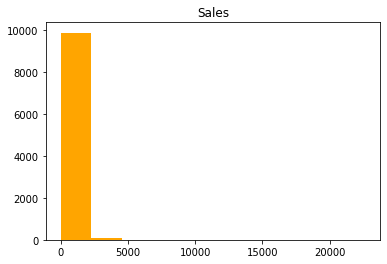

In [91]:
superstore[['Sales']].hist(grid=False, color='orange',
                              sharex=True, sharey=True)

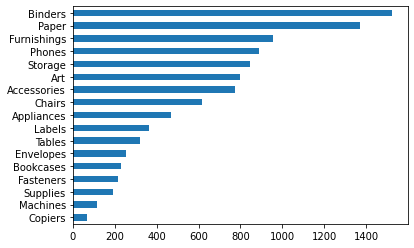

In [98]:
superstore['Sub_Category'].value_counts().sort_values().plot.barh()

Text(0, 0.5, 'Count')

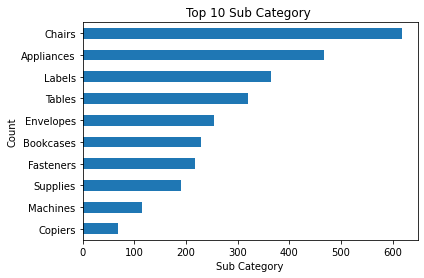

In [47]:
ax = superstore['Sub_Category'].value_counts(ascending=True).head(10) \
    .plot(kind='barh', title='Top 10 Sub Category ')
ax.set_xlabel('Sub Category')
ax.set_ylabel('Count')

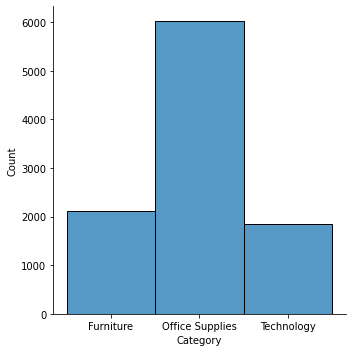

In [48]:

sns.displot(superstore, x="Category")

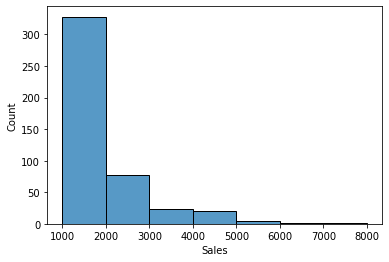

In [49]:
sns.histplot(superstore['Sales'], bins=[1000, 2000, 3000, 4000,5000, 6000, 7000, 8000])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Sales')

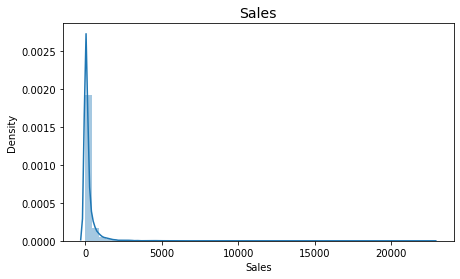

In [50]:
plt.figure(figsize=(7,4))
sns.distplot(superstore['Sales'],kde=True)
plt.title('Sales', size=14)

Barplots

Text(0.5, 1.0, 'Top 10 Sub Category')

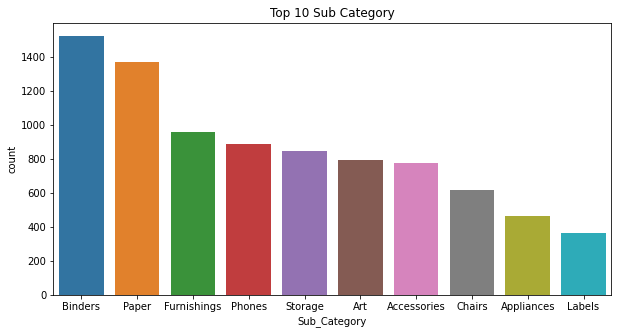

In [51]:
plt.figure(figsize=(10,5))
sns.countplot(x='Sub_Category', data=superstore,
              order=superstore['Sub_Category'].value_counts().nlargest(10).index)
plt.title('Top 10 Sub Category')

In [106]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

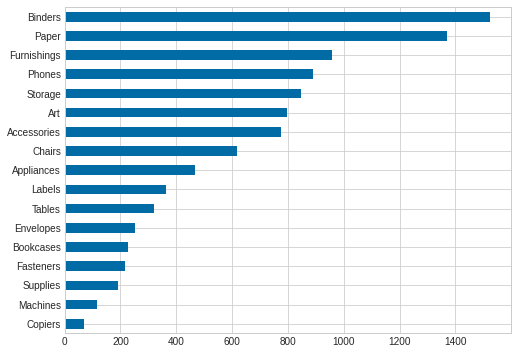

In [112]:
plt.figure(figsize=(8,6))
plt.style.use('tableau-colorblind10')
superstore.Sub_Category.value_counts().sort_values().plot.barh()

Line Chart

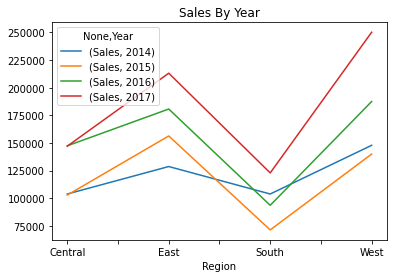

In [52]:
df_pivot = superstore.pivot_table(
    index='Region', columns='Year',
    values=['Sales'], aggfunc=sum)

df_pivot.plot()
plt.title('Sales By Year')
plt.show()

Scatter Plot

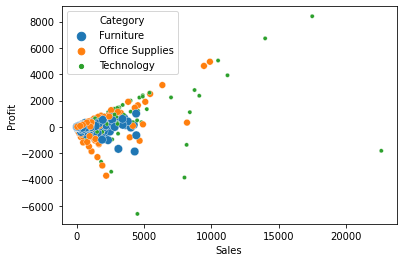

In [53]:
sns.scatterplot(data=superstore,
                x='Sales',
                y="Profit",
                hue='Category',
                size='Category')

Text(3.174999999999997, 0.5, 'Profit')

<Figure size 576x288 with 0 Axes>

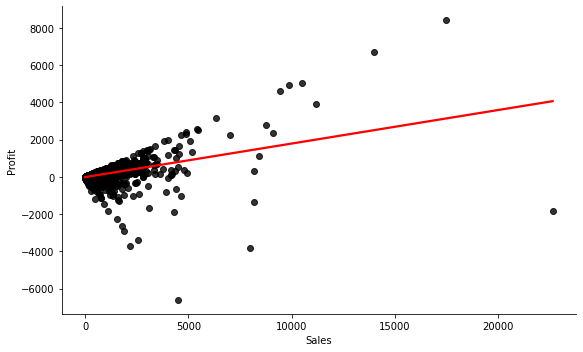

In [54]:
plt.figure(figsize=(8,4))
sns.lmplot(data = superstore, x="Sales", y="Profit", 
           height=5, aspect=1.64,
           ci=False,
           line_kws={'color': 'red'}, 
           scatter_kws={"color": "black"})
plt.xlabel('Sales')
plt.ylabel('Profit')

In [55]:
superstore.columns

Index(['Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode', 'Customer_ID',
       'Customer_Name', 'Segment', 'Country', 'City', 'State', 'Postal_Code',
       'Region', 'Product_ID', 'Category', 'Sub_Category', 'Product_Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Year'],
      dtype='object')

Join Plot

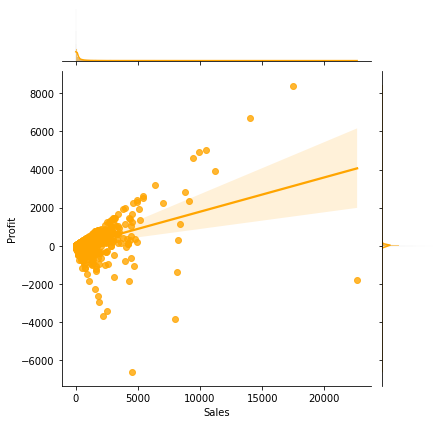

In [87]:
sns.jointplot(data=superstore,
            x='Sales', y='Profit',
            kind='reg',
            color='orange', )

ฺBox Plot

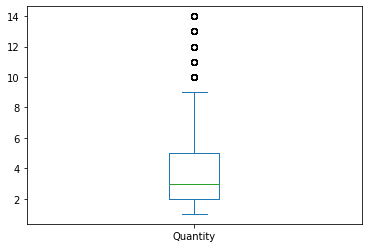

In [100]:
superstore[['Quantity']].plot.box()

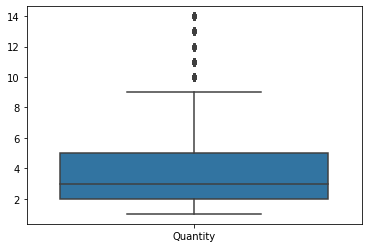

In [56]:
sns.boxplot(data=superstore[['Quantity']])

Text(0.5, 1.0, 'Total profit of the segment')

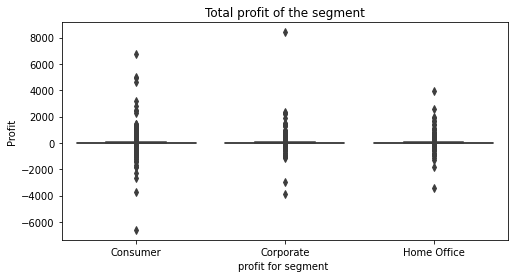

In [57]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Segment', y='Profit', data=superstore)
plt.xlabel('profit for segment ')
plt.title('Total profit of the segment')

Heatmap

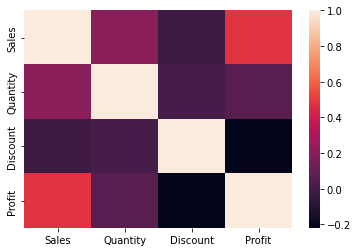

In [58]:
sns.heatmap(superstore[['Sales','Quantity','Discount','Profit']].corr())

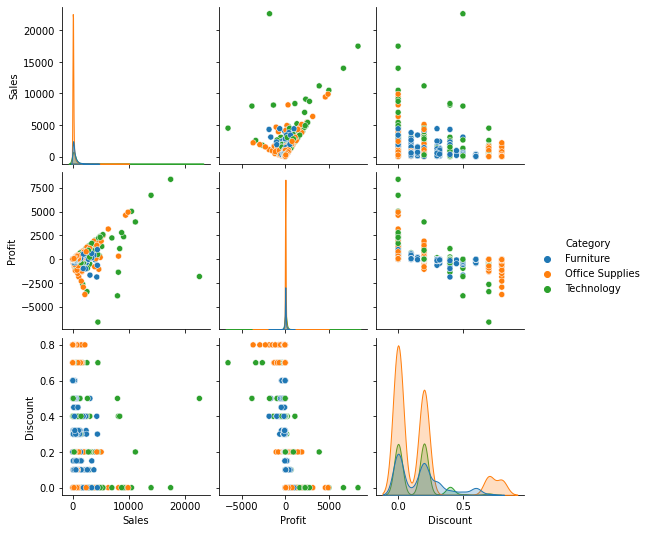

In [74]:
sns.pairplot(superstore, vars=['Sales', 'Profit', 'Discount'],
             hue='Category')

Facet Grid

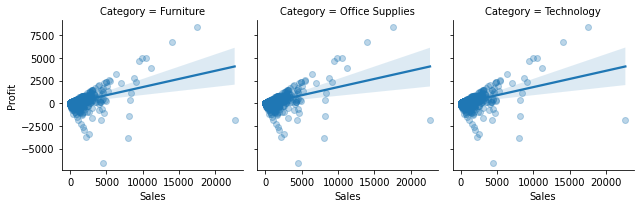

In [60]:
g = sns.FacetGrid(superstore, col='Category')
g.map(sns.regplot, x='Sales', y='Profit', data=superstore, fit_reg=True, scatter_kws={'alpha':.3})

# Data Cleansing with Pandas

In [61]:
superstore[superstore.isna()]

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,...,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Year
Row ID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9991,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9992,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
# เช็ค missing value
superstore.isna().sum()

Order_ID         0
Order_Date       0
Ship_Date        0
Ship_Mode        0
Customer_ID      0
Customer_Name    0
Segment          0
Country          0
City             0
State            0
Postal_Code      0
Region           0
Product_ID       0
Category         0
Sub_Category     0
Product_Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Year             0
dtype: int64

In [63]:
superstore[superstore.isna().any(axis=1)]

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,...,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Year
Row ID,,,,,,,,,,,,,,,,,,,,,


เช็ค Customer_ID มีค่าที่เกินกว่าขอบเขตไหม เช่น ข้อมูล ID ที่ถูกต้องในคอลัม์ Customer_ID มีหน้าตา CM-12190 เข้าไปหามีตัวอักษรพิมพ์เล็กและตัวเลขที่เกินกว่า 5 หลัก

In [64]:
superstore[superstore['Customer_ID'].str.contains('^[A-Za-z]{2}-[A-Za-z0-9]{6}$')]

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,...,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Year
Row ID,,,,,,,,,,,,,,,,,,,,,


In [65]:
# เช็ค Order_ID มีค่าที่ขอบเขตหรือไม่ 
# ตย. order id CA-2017-119914 
superstore[superstore['Order_ID'].str.contains("^[A-Za-z]{3}-[0-9]{5}-[0-9]{7}$")]

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,...,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Year
Row ID,,,,,,,,,,,,,,,,,,,,,


Customer_ID ไม่มีข้อมูลที่ค่าผิดปกติ

หาค่า Unique ในแต่ละคอลัมน์

In [66]:
superstore['Customer_ID'].unique()

array(['CG-12520', 'DV-13045', 'SO-20335', 'BH-11710', 'AA-10480',
       'IM-15070', 'HP-14815', 'PK-19075', 'AG-10270', 'ZD-21925',
       'KB-16585', 'SF-20065', 'EB-13870', 'EH-13945', 'TB-21520',
       'MA-17560', 'GH-14485', 'SN-20710', 'LC-16930', 'RA-19885',
       'ES-14080', 'ON-18715', 'PO-18865', 'LH-16900', 'DP-13000',
       'JM-15265', 'TB-21055', 'KM-16720', 'PS-18970', 'BS-11590',
       'KD-16270', 'HM-14980', 'JE-15745', 'KB-16600', 'SC-20770',
       'DN-13690', 'JC-16105', 'CS-12400', 'PG-18895', 'GM-14455',
       'JS-15685', 'KB-16315', 'RB-19705', 'PN-18775', 'KD-16345',
       'ER-13855', 'RB-19465', 'GZ-14470', 'LC-16870', 'JM-15250',
       'PA-19060', 'CV-12805', 'CL-12565', 'RC-19960', 'DK-13090',
       'GG-14650', 'SC-20725', 'AD-10180', 'PF-19165', 'TS-21610',
       'LS-16975', 'DW-13585', 'LC-16885', 'JD-15895', 'SH-19975',
       'SG-20080', 'HA-14920', 'MG-17680', 'JE-16165', 'TW-21025',
       'SP-20650', 'NK-18490', 'DB-13060', 'NP-18670', 'TT-210

In [67]:
superstore['City'].unique()

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
       'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul',
       'Aurora', 'Charlotte', 'Orland Park', 'Urbandale', 'Columbus',
       'Bristol', 'Wilmington', 'Bloomington', 'Phoenix', 'Roseville',
       'Independence', 'Pasadena', 'Newark', 'Franklin', 'Scottsdale',
       'San Jose', 'Edmond', 'Carlsbad', 'San Antonio', 'Monroe',
       'Fairfield', 'Grand Prairie', 'Redlands', 'Hamilton', 'Westfield',
       'Akron', 'Denver', 'Dallas', 'Whittier', 'Saginaw', 'Medina',
       'Dublin', 'Detroit', 'Tampa', 'Santa Clara', 'Lakeville',
       'San Diego', 'Brentwood', 'Cha

In [68]:
superstore['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

เช็คว่ามีแถวไหนข้อมูลซ้ำมั้ย (Duplicated)

In [69]:
superstore.duplicated(['Customer_ID'], keep =False)

Row ID
1       True
2       True
3       True
4       True
5       True
        ... 
9990    True
9991    True
9992    True
9993    True
9994    True
Length: 9994, dtype: bool

# Save to CSV

In [70]:
superstore.to_csv('supersotre_final.csv', index=True)